### Explanation:

First, recall from Problem 1.3 the formula for the signed perpendicular distance of a general hyperplane defined by \( \theta \), \( \theta_0 \) to a point \( x \):
$$ \frac{{\theta^T x + \theta_0}}{{\| \theta \|}} $$

In order to code this, we can think of it as a 3-step process:

1. Matrix multiply the transpose of \( \theta \) and \( x \) (this can be done as `np.dot(np.transpose(th), x)`, `np.matmul(np.transpose(th), x)`, or `np.transpose(th) @ x` but NOT as `np.transpose * x`, which is element-wise multiplication)
2. Add \( \theta_0 \) to this product (`+ th0`)
3. Divide the entire thing by the norm of \( \theta \) (`length(th)` as defined in 2.6). Make sure you divide the **entire** sum by `length(th)`, not just `th0`!

Putting these all together gives us our desired solution: 
```python
(np.dot(np.transpose(th), x) + th0) / length(th)


In [7]:
import numpy as np
# x is dimension d by 1
# th is dimension d by 1
# th0 is a scalar
# return 1 by 1 matrix of signed distance
def signed_dist(x, th, th0):
   return ((th.T@x) + th0) / np.linalg.norm(th)

In [12]:
def margin(x, y, th, th0):
    return y * signed_dist(x, th, th0)

# Labeled points: [feature vector, label]
labeled_points = np.array([
    [[3, 2], [1]],
    [[1, 1], [-1]],
    [[4, 2], [-1]],
])

theta = np.array([[1],
                  [1]])
theta0 = np.array([-4])

# Calculate margins for each labeled point
for point in labeled_points:
    x, y = point[0], point[1]
    print(margin(x, y, theta, theta0))

[0.70710678]
[1.41421356]
[-1.41421356]


/var/folders/kc/txgh3xkn0xgfsxb3fpxhwsvc0000gn/T/ipykernel_86262/3455763206.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labeled_points = np.array([


[-0.]
[2.]
[1.]
[-1.]


/var/folders/kc/txgh3xkn0xgfsxb3fpxhwsvc0000gn/T/ipykernel_86262/1452558457.py:36: RuntimeWarning: divide by zero encountered in divide
  y_vals = (-theta[0] * x_vals - theta0) / theta[1]


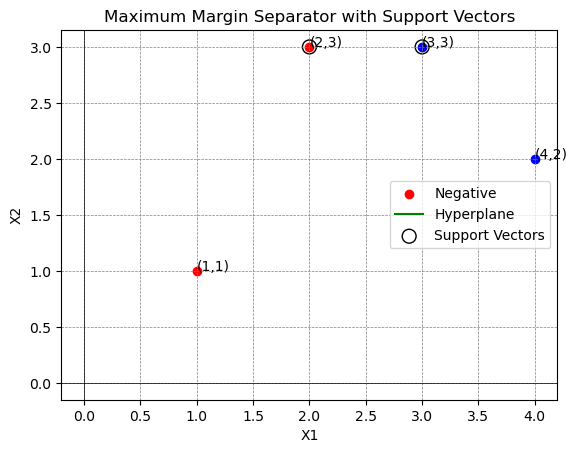

0.125


In [54]:
data = np.array([[1,3],
                 [1,1],
                 [3,4],
                 [3,2]])
labels = np.array([-1, -1, 1, 1])
th = np.array([[0], [1]])
th0 = np.array([-3])
margins = [margin(data[i], labels[i], th, th0) for i in range(4)]

print(margins[0])
print(margins[1])
print(margins[2])
print(margins[3])

import matplotlib.pyplot as plt
import numpy as np

# Define the data points
data = np.array([[1, 1], [2, 3], [3, 3], [4, 2]])
labels = np.array([-1, -1, 1, 1])

# Define the separator
theta = np.array([1, 0])
theta0 = -2

# Plot the points
for i, point in enumerate(data):
    if labels[i] == 1:
        plt.scatter(point[0], point[1], color='blue', label='Positive' if i == 0 else "")
    else:
        plt.scatter(point[0], point[1], color='red', label='Negative' if i == 0 else "")
    plt.annotate(f'({point[0]},{point[1]})', (point[0], point[1]))

# Plot the hyperplane
x_vals = np.linspace(0, 5, 100)
y_vals = (-theta[0] * x_vals - theta0) / theta[1]
plt.plot(x_vals, y_vals, label='Hyperplane', color='green')

# Plot the support vectors
support_vectors = data[[1, 2]]  # Example support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Maximum Margin Separator with Support Vectors")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
print((1/8))

### Explanation:

First, recall the formula for how we determine which side of the hyperplane defined by \( \theta \), \( \theta_0 \) a point \( x \) lies on:
$$ \text{sign}(\theta^T x + \theta_0) $$

The expression inside the `sign()` function can be coded the same way we did in the previous problem, leading to our desired solution:
```python
np.sign(np.dot(np.transpose(th), x) + th0)


In [3]:
def positive(x, th, th0):
   return np.sign(np.dot(np.transpose(th), x) + th0)

def score(data, labels, th, th0):
    return np.sum(positive(data, th, th0) == labels)

In [4]:
def perceptron(data, labels, th_init, th0_init, max_iter=1000):
    th = th_init
    th0 = th0_init
    for _ in range(max_iter):
        for i in range(data.shape[1]):
            if labels[i] * (np.dot(th.T, data[:, i]) + th0) <= 0:
                th = th + labels[i] * data[:, i]
                th0 = th0 + labels[i]
    return th, th0

# Veri seti
data = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
]).T

labels = np.array([1, 1, -1, -1, 1])

# Başlangıç ağırlık vektörleri
th_init_1 = np.array([0, 0])
th0_init_1 = 0

th_init_2 = np.array([1, 1])
th0_init_2 = 0

# Perceptron algoritmasını çalıştırma
th_1, th0_1 = perceptron(data, labels, th_init_1, th0_init_1)
th_2, th0_2 = perceptron(data, labels, th_init_2, th0_init_2)

# Sonuçları yazdırma
print("θ(0) = [0, 0] ile sonuç:")
print("th:", th_1)
print("th0:", th0_1)

print("\nθ(0) = [1, 1] ile sonuç:")
print("th:", th_2)
print("th0:", th0_2)

θ(0) = [0, 0] ile sonuç:
th: [ 5 -1]
th0: -6

θ(0) = [1, 1] ile sonuç:
th: [6 0]
th0: -6


In [1]:
# Implement perceptron, average perceptron, and pegasos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pdb
import itertools
import operator
import functools

print("Importing code_for_hw03")

######################################################################
# Plotting

def tidy_plot(xmin, xmax, ymin, ymax, center = False, title = None,
                 xlabel = None, ylabel = None):
    plt.ion()
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.get_xaxis().tick_bottom()  
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin-eps, xmax+eps)
    plt.ylim(ymin-eps, ymax+eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax

def plot_separator(ax, th, th_0):
    xmin, xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    pts = []
    eps = 1.0e-6
    # xmin boundary crossing is when xmin th[0] + y th[1] + th_0 = 0
    # that is, y = (-th_0 - xmin th[0]) / th[1]
    if abs(th[1,0]) > eps:
        pts += [np.array([x, (-th_0 - x * th[0,0]) / th[1,0]]) \
                                                        for x in (xmin, xmax)]
    if abs(th[0,0]) > 1.0e-6:
        pts += [np.array([(-th_0 - y * th[1,0]) / th[0,0], y]) \
                                                         for y in (ymin, ymax)]
    in_pts = []
    for p in pts:
        if (xmin-eps) <= p[0] <= (xmax+eps) and \
           (ymin-eps) <= p[1] <= (ymax+eps):
            duplicate = False
            for p1 in in_pts:
                if np.max(np.abs(p - p1)) < 1.0e-6:
                    duplicate = True
            if not duplicate:
                in_pts.append(p)
    if in_pts and len(in_pts) >= 2:
        # Plot separator
        vpts = np.vstack(in_pts)
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Plot normal
        vmid = 0.5*(in_pts[0] + in_pts[1])
        scale = np.sum(th*th)**0.5
        diff = in_pts[0] - in_pts[1]
        dist = max(xmax-xmin, ymax-ymin)
        vnrm = vmid + (dist/10)*(th.T[0]/scale)
        vpts = np.vstack([vmid, vnrm])
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Try to keep limits from moving around
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
    else:
        print('Separator not in plot range')

def plot_data(data, labels, ax = None, clear = False,
                  xmin = None, xmax = None, ymin = None, ymax = None):
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin; y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    colors = np.choose(labels > 0, cv(['r', 'g']))[0]
    ax.scatter(data[0,:], data[1,:], c = colors,
                    marker = 'o', s=50, edgecolors = 'none')
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.grid(True, which='both')
    #ax.axhline(y=0, color='k')
    #ax.axvline(x=0, color='k')
    return ax

# Must either specify limits or existing ax
def plot_nonlin_sep(predictor, ax = None, xmin = None , xmax = None,
                        ymin = None, ymax = None, res = 30):
    if ax is None:
        ax = tidy_plot(xmin, xmax, ymin, ymax)
    else:
        if xmin == None:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
        else:
            ax.set_xlim((xmin, xmax))
            ax.set_ylim((ymin, ymax))

    cmap = colors.ListedColormap(['black', 'white'])
    bounds=[-2,0,2]
    norm = colors.BoundaryNorm(bounds, cmap.N)            
            
    ima = np.array([[predictor(x1i, x2i) \
                         for x1i in np.linspace(xmin, xmax, res)] \
                         for x2i in np.linspace(ymin, ymax, res)])
    im = ax.imshow(np.flipud(ima), interpolation = 'none',
                       extent = [xmin, xmax, ymin, ymax],
                       cmap = cmap, norm = norm)

######################################################################
#   Utilities

# Takes a list of numbers and returns a column vector:  n x 1
def cv(value_list):
    return np.transpose(rv(value_list))

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])

# x is dimension d by 1
# th is dimension d by 1
# th0 is a scalar
# return a 1 by 1 matrix
def y(x, th, th0):
   return np.dot(np.transpose(th), x) + th0

# x is dimension d by 1
# th is dimension d by 1
# th0 is dimension 1 by 1
# return 1 by 1 matrix of +1, 0, -1
def positive(x, th, th0):
   return np.sign(y(x, th, th0))

# data is dimension d by n
# labels is dimension 1 by n
# ths is dimension d by 1
# th0s is dimension 1 by 1
# return 1 by 1 matrix of integer indicating number of data points correct for
# each separator.
def score(data, labels, th, th0):
   return np.sum(positive(data, th, th0) == labels)

######################################################################
#   Data Sets

# Return d = 2 by n = 4 data matrix and 1 x n = 4 label matrix
def super_simple_separable_through_origin():
    X = np.array([[2, 3, 9, 12],
                  [5, 1, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

def super_simple_separable():
    X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

def xor():
    X = np.array([[1, 2, 1, 2],
                  [1, 2, 2, 1]])
    y = np.array([[1, 1, -1, -1]])
    return X, y

def xor_more():
    X = np.array([[1, 2, 1, 2, 2, 4, 1, 3],
                  [1, 2, 2, 1, 3, 1, 3, 3]])
    y = np.array([[1, 1, -1, -1, 1, 1, -1, -1]])
    return X, y

######################################################################
#   Tests for part 2:  features

# Make it take miscellaneous args and pass into learner
def test_linear_classifier_with_features(dataFun, learner, feature_fun,
                             draw = True, refresh = True, pause = True):
    raw_data, labels = dataFun()
    data = feature_fun(raw_data) if feature_fun else raw_data
    if draw:
        ax = plot_data(raw_data, labels)
        def hook(params):
            (th, th0) = params
            plot_nonlin_sep(
                lambda x1,x2: int(positive(feature_fun(cv([x1, x2])), th, th0)),
                ax = ax)
            plot_data(raw_data, labels, ax)
            plt.pause(0.05)
            print('th', th.T, 'th0', th0)
            if pause: input('press enter here to continue:')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook)
    if hook: hook((th, th0))
    print("Final score", int(score(data, labels, th, th0)))
    print("Params", np.transpose(th), th0)

def mul(seq):
    return functools.reduce(operator.mul, seq, 1)

def make_polynomial_feature_fun(order):
    # raw_features is d by n
    # return is k by n where k = sum_{i = 0}^order  multichoose(d, i)
    def f(raw_features):
        d, n = raw_features.shape
        result = []   # list of column vectors
        for j in range(n):
            features = []
            for o in range(order+1):
                indexTuples = \
                          itertools.combinations_with_replacement(range(d), o)
                for it in indexTuples:
                    features.append(mul(raw_features[i, j] for i in it))
            result.append(cv(features))
        return np.hstack(result)
    return f

def test_with_features(dataFun, order = 2, draw=True, pause=True):
    test_linear_classifier_with_features(
        dataFun,                        # data
        perceptron,                     # learner
        make_polynomial_feature_fun(order), # feature maker
        draw=draw,
        pause=pause)

# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def perceptron(data, labels, params = {}, hook = None):
    T = params.get('T', 100)
    (d, n) = data.shape
    m = 0
    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                m += 1
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
    return theta, theta_0




######################################################################
#   Tests for part 2D:  Encoding discrete values

def one_hot_internal(x, k):
    # Make an empty column vector
    v = np.zeros((k, 1))
    # Set an entry to 1
    v[x-1, 0] = 1
    return v

def test_one_hot(sub):
    if one_hot_internal(3, 5).tolist() == sub(3, 5).tolist() and one_hot_internal(4, 7).tolist() == sub(4, 7).tolist():
        print("Passed! \n")
    else: print("Test Failed")

#-----------------------------------------------------------------------------
print("Imported tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv, rv, y, positive, score")
print("Datasets: super_simple_separable_through_origin(), super_simple_separable(), xor(), xor_more()")
print("Tests for part 2: test_linear_classifier_with_features, mul, make_polynomial_feature_fun, ")
print("                  test_with_features")
print("Also loaded: perceptron, one_hot_internal, test_one_hot")

######################################################################
#   Example for part 3B) test_with_features()
#test_with_features(super_simple_separable, 2, draw=True, pause=True)


Importing code_for_hw03
Imported tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv, rv, y, positive, score
Datasets: super_simple_separable_through_origin(), super_simple_separable(), xor(), xor_more()
Tests for part 2: test_linear_classifier_with_features, mul, make_polynomial_feature_fun, 
                  test_with_features
Also loaded: perceptron, one_hot_internal, test_one_hot


In [ ]:
# Implement perceptron, average perceptron, and pegasos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.image import imread


print("Importing code_for_hw03 (part 2, imported as hw3)")

######################################################################
# Plotting

def tidy_plot(xmin, xmax, ymin, ymax, center = False, title = None,
                 xlabel = None, ylabel = None):
    plt.ion()
    plt.figure(facecolor="white")
    ax = plt.subplot()
    if center:
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    else:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
    eps = .05
    plt.xlim(xmin-eps, xmax+eps)
    plt.ylim(ymin-eps, ymax+eps)
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    return ax

def plot_separator(ax, th, th_0):
    xmin, xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    pts = []
    eps = 1.0e-6
    # xmin boundary crossing is when xmin th[0] + y th[1] + th_0 = 0
    # that is, y = (-th_0 - xmin th[0]) / th[1]
    if abs(th[1,0]) > eps:
        pts += [np.array([x, (-th_0 - x * th[0,0]) / th[1,0]]) \
                                                        for x in (xmin, xmax)]
    if abs(th[0,0]) > 1.0e-6:
        pts += [np.array([(-th_0 - y * th[1,0]) / th[0,0], y]) \
                                                         for y in (ymin, ymax)]
    in_pts = []
    for p in pts:
        if (xmin-eps) <= p[0] <= (xmax+eps) and \
           (ymin-eps) <= p[1] <= (ymax+eps):
            duplicate = False
            for p1 in in_pts:
                if np.max(np.abs(p - p1)) < 1.0e-6:
                    duplicate = True
            if not duplicate:
                in_pts.append(p)
    if in_pts and len(in_pts) >= 2:
        # Plot separator
        vpts = np.vstack(in_pts)
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Plot normal
        vmid = 0.5*(in_pts[0] + in_pts[1])
        scale = np.sum(th*th)**0.5
        diff = in_pts[0] - in_pts[1]
        dist = max(xmax-xmin, ymax-ymin)
        vnrm = vmid + (dist/10)*(th.T[0]/scale)
        vpts = np.vstack([vmid, vnrm])
        ax.plot(vpts[:,0], vpts[:,1], 'k-', lw=2)
        # Try to keep limits from moving around
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
    else:
        print('Separator not in plot range')

def plot_data(data, labels, ax = None, clear = False,
                  xmin = None, xmax = None, ymin = None, ymax = None):
    if ax is None:
        if xmin == None: xmin = np.min(data[0, :]) - 0.5
        if xmax == None: xmax = np.max(data[0, :]) + 0.5
        if ymin == None: ymin = np.min(data[1, :]) - 0.5
        if ymax == None: ymax = np.max(data[1, :]) + 0.5
        ax = tidy_plot(xmin, xmax, ymin, ymax)

        x_range = xmax - xmin; y_range = ymax - ymin
        if .1 < x_range / y_range < 10:
            ax.set_aspect('equal')
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    elif clear:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
        ax.clear()
    else:
        xlim, ylim = ax.get_xlim(), ax.get_ylim()
    colors = np.choose(labels > 0, cv(['r', 'g']))[0]
    ax.scatter(data[0,:], data[1,:], c = colors,
                    marker = 'o', s=50, edgecolors = 'none')
    # Seems to occasionally mess up the limits
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.grid(True, which='both')
    #ax.axhline(y=0, color='k')
    #ax.axvline(x=0, color='k')
    return ax

######################################################################
#   Utilities

# Takes a list of numbers and returns a column vector:  n x 1
def cv(value_list):
    return np.transpose(rv(value_list))

# Takes a list of numbers and returns a row vector: 1 x n
def rv(value_list):
    return np.array([value_list])

# x is dimension d by n
# th is dimension d by m
# th0 is dimension 1 by m
# return matrix of y values for each column of x and theta: dimension m x n
def y(x, th, th0):
    return np.dot(np.transpose(th), x) + np.transpose(th0)

def length(d_by_m):
    return np.sum(d_by_m * d_by_m, axis = 0, keepdims = True)**0.5

# x is dimension d by n
# th is dimension d by m
# th0 is dimension 1 by m
# return matrix of signed dist for each column of x and theta: dimension m x n
def signed_dist(x, th, th0):
    return y(x, th, th0) / np.transpose(length(th))
######################################################################
# Perceptron code

# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def perceptron(data, labels, params = {}, hook = None):
    # if T not in params, default to 50
    T = params.get('T', 50)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
    return theta, theta_0

def averaged_perceptron(data, labels, params = {}, hook = None):
    T = params.get('T', 100)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    theta_sum = theta.copy()
    theta_0_sum = theta_0.copy()
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
            theta_sum = theta_sum + theta
            theta_0_sum = theta_0_sum + theta_0
    theta_avg = theta_sum / (T*n)
    theta_0_avg = theta_0_sum / (T*n)
    if hook: hook((theta_avg, theta_0_avg))
    return theta_avg, theta_0_avg

def positive(x, th, th0):
    return np.sign(th.T@x + th0)

def score(data, labels, th, th0):
    return np.sum(positive(data, th, th0) == labels)

def eval_classifier(learner, data_train, labels_train, data_test, labels_test):
    th, th0 = learner(data_train, labels_train)
    return score(data_test, labels_test, th, th0)/data_test.shape[1]

def xval_learning_alg(learner, data, labels, k):
    _, n = data.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    data, labels = data[:,idx], labels[:,idx]

    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)

    score_sum = 0
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test)
    return score_sum/k

######################################################################
#   Tests

def test_linear_classifier(dataFun, learner, learner_params = {},
                             draw = True, refresh = True, pause = True):
    data, labels = dataFun()
    d, n = data.shape
    if draw:
        ax = plot_data(data, labels)
        def hook(params):
            (th, th0) = params
            if refresh: plot_data(data, labels, ax, clear = True)
            plot_separator(ax, th, th0)
            print('th', th.T, 'th0', th0)
            if pause: input('go?')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook, params = learner_params)
    print("Final score", float(score(data, labels, th, th0)) / n)
    print("Params", np.transpose(th), th0)

######################################################################
# For auto dataset

def load_auto_data(path_data):
    """
    Returns a list of dict with keys:
    """
    numeric_fields = {'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                      'acceleration', 'model_year', 'origin'}
    data = []
    with open(path_data) as f_data:
        for datum in csv.DictReader(f_data, delimiter='\t'):
            for field in list(datum.keys()):
                if field in numeric_fields and datum[field]:
                    datum[field] = float(datum[field])
            data.append(datum)
    return data

# Feature transformations
def std_vals(data, f):
    vals = [entry[f] for entry in data]
    avg = sum(vals)/len(vals)
    dev = [(entry[f] - avg)**2 for entry in data]
    sd = (sum(dev)/len(vals))**0.5
    return (avg, sd)

def standard(v, std):
    return [(v-std[0])/std[1]]

def raw(x):
    return [x]

def one_hot(v, entries):
    vec = len(entries)*[0]
    vec[entries.index(v)] = 1
    return vec

# The class (mpg) added to the front of features
def auto_data_and_labels(auto_data, features):
    features = [('mpg', raw)] + features
    std = {f:std_vals(auto_data, f) for (f, phi) in features if phi==standard}
    entries = {f:list(set([entry[f] for entry in auto_data])) \
               for (f, phi) in features if phi==one_hot}
    print('avg and std', std)
    print('entries in one_hot field', entries)
    vals = []
    for entry in auto_data:
        phis = []
        for (f, phi) in features:
            if phi == standard:
                phis.extend(phi(entry[f], std[f]))
            elif phi == one_hot:
                phis.extend(phi(entry[f], entries[f]))
            else:
                phis.extend(phi(entry[f]))
        vals.append(np.array([phis]))
    data_labels = np.vstack(vals)
    return data_labels[:, 1:].T, data_labels[:, 0:1].T

######################################################################
# For food review dataset

from string import punctuation, digits, printable
import csv

def load_review_data(path_data):
    """
    Returns a list of dict with keys:
    * sentiment: +1 or -1 if the review was positive or negative, respectively
    * text: the text of the review
    """
    basic_fields = {'sentiment', 'text'}
    data = []
    with open(path_data) as f_data:
        for datum in csv.DictReader(f_data, delimiter='\t'):
            for field in list(datum.keys()):
                if field not in basic_fields:
                    del datum[field]
            if datum['sentiment']:
                datum['sentiment'] = int(datum['sentiment'])
            data.append(datum)
    return data

printable = set(printable)
def clean(s):
    return filter(lambda x: x in printable, s)

def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    # return [ps.stem(w) for w in input_string.lower().split()]
    return input_string.lower().split()

def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by Section 3 (e.g. remove stopwords, add bigrams etc.)
    """
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.
    """

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] = 1
    # We want the feature vectors as columns
    return feature_matrix.T


def reverse_dict(d):
    return {v: k for k, v in d.items()}


######################################################################
# For MNIST dataset


# NOTE you should use this function to evaluate your MNIST results!
def get_classification_accuracy(data, labels):
    """
    @param data (d,n) array
    @param labels (1,n) array
    """
    return xval_learning_alg(lambda data, labels: perceptron(data, labels, {"T": 50}), data, labels, 10)


def load_mnist_data(labels):
    """
    @param labels list of labels from {0, 1,...,9}
    @return dict: label (int) -> [[image1], [image2], ...]
    """

    data = {}

    for label in labels:
        images = load_mnist_single("mnist/mnist_train{}.png".format(label))
        y = np.array([[label] * len(images)])
        data[label] = {
            "images": images,
            "labels": y
        }

    return data


def load_mnist_single(path_data):
    """
    @return list of images (first row of large picture)
    """

    img = imread(path_data)  # 2156 x 2156 (m,n)
    m, n = img.shape

    side_len = 28  # standard mnist
    n_img = int(m / 28)

    imgs = []  # list of single images
    for i in range(n_img):
        start_ind = i*side_len
        end_ind = start_ind + side_len
        current_img = img[start_ind:end_ind, :side_len]  # 28 by 28

        current_img = current_img / 255 # normalization!!!

        imgs.append(current_img)

    return imgs

#-----------------------------------------------------------------------------

print("Imported tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv, rv, y, positive, score")
print("         xval_learning_alg, eval_classifier")
print("Tests: test_linear_classifier")
print("Dataset tools: load_auto_data, std_vals, standard, raw, one_hot, auto_data_and_labels")
print("               load_review_data, clean, extract_words, bag_of_words, extract_bow_feature_vectors")
print("               load_mnist_data, load_mnist_single")


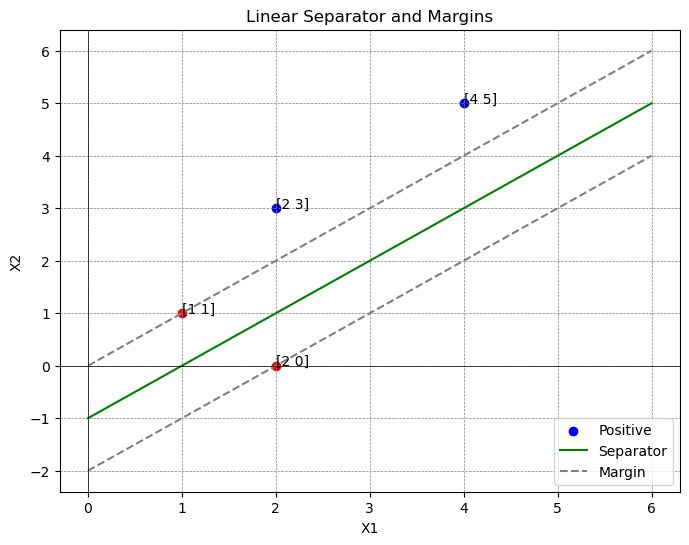

[-1.414213562373095,
 -1.414213562373095,
 0.7071067811865475,
 -0.7071067811865475]

In [2]:
# Veri noktaları ve etiketler
data = np.array([[2, 3], [4, 5], [1, 1], [2, 0]])
labels = np.array([1, 1, -1, -1])

# Ağırlık vektörü ve bias terimi
theta = np.array([1, -1])
theta0 = -1

# Marjin hesaplama fonksiyonu
def margin(x, y, theta, theta0):
    return y * (np.dot(theta, x) + theta0) / np.linalg.norm(theta)

# Marjinleri hesapla
margins = [margin(data[i], labels[i], theta, theta0) for i in range(len(data))]

# Grafik çizimi
plt.figure(figsize=(8, 6))

# Veri noktalarını çiz
for i in range(len(data)):
    if labels[i] == 1:
        plt.scatter(data[i, 0], data[i, 1], color='blue', label='Positive' if i == 0 else "")
    else:
        plt.scatter(data[i, 0], data[i, 1], color='red', label='Negative' if i == 0 else "")
    plt.annotate(f'{data[i]}', (data[i, 0], data[i, 1]))

# Ayırıcıyı çiz
x_vals = np.linspace(0, 6, 100)
y_vals = (theta[0] * x_vals + theta0) / -theta[1]
plt.plot(x_vals, y_vals, label='Separator', color='green')

# Marjin çizgilerini çiz
y_margin1 = (theta[0] * x_vals + theta0 + 1) / -theta[1]
y_margin2 = (theta[0] * x_vals + theta0 - 1) / -theta[1]
plt.plot(x_vals, y_margin1, '--', color='gray', label='Margin')
plt.plot(x_vals, y_margin2, '--', color='gray')

# Grafik ayarları
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Linear Separator and Margins")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

margins
